In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, KBinsDiscretizer

# Load dataset
df = pd.read_csv('banking.csv')

# Handle missing values
df.replace('unknown', np.nan, inplace=True)
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].mean())

# Detect and handle outliers using Z-score method
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).all(axis=1)
df = df[~outliers]

print("Task 1: Preprocessing completed.")

Task 1: Preprocessing completed.


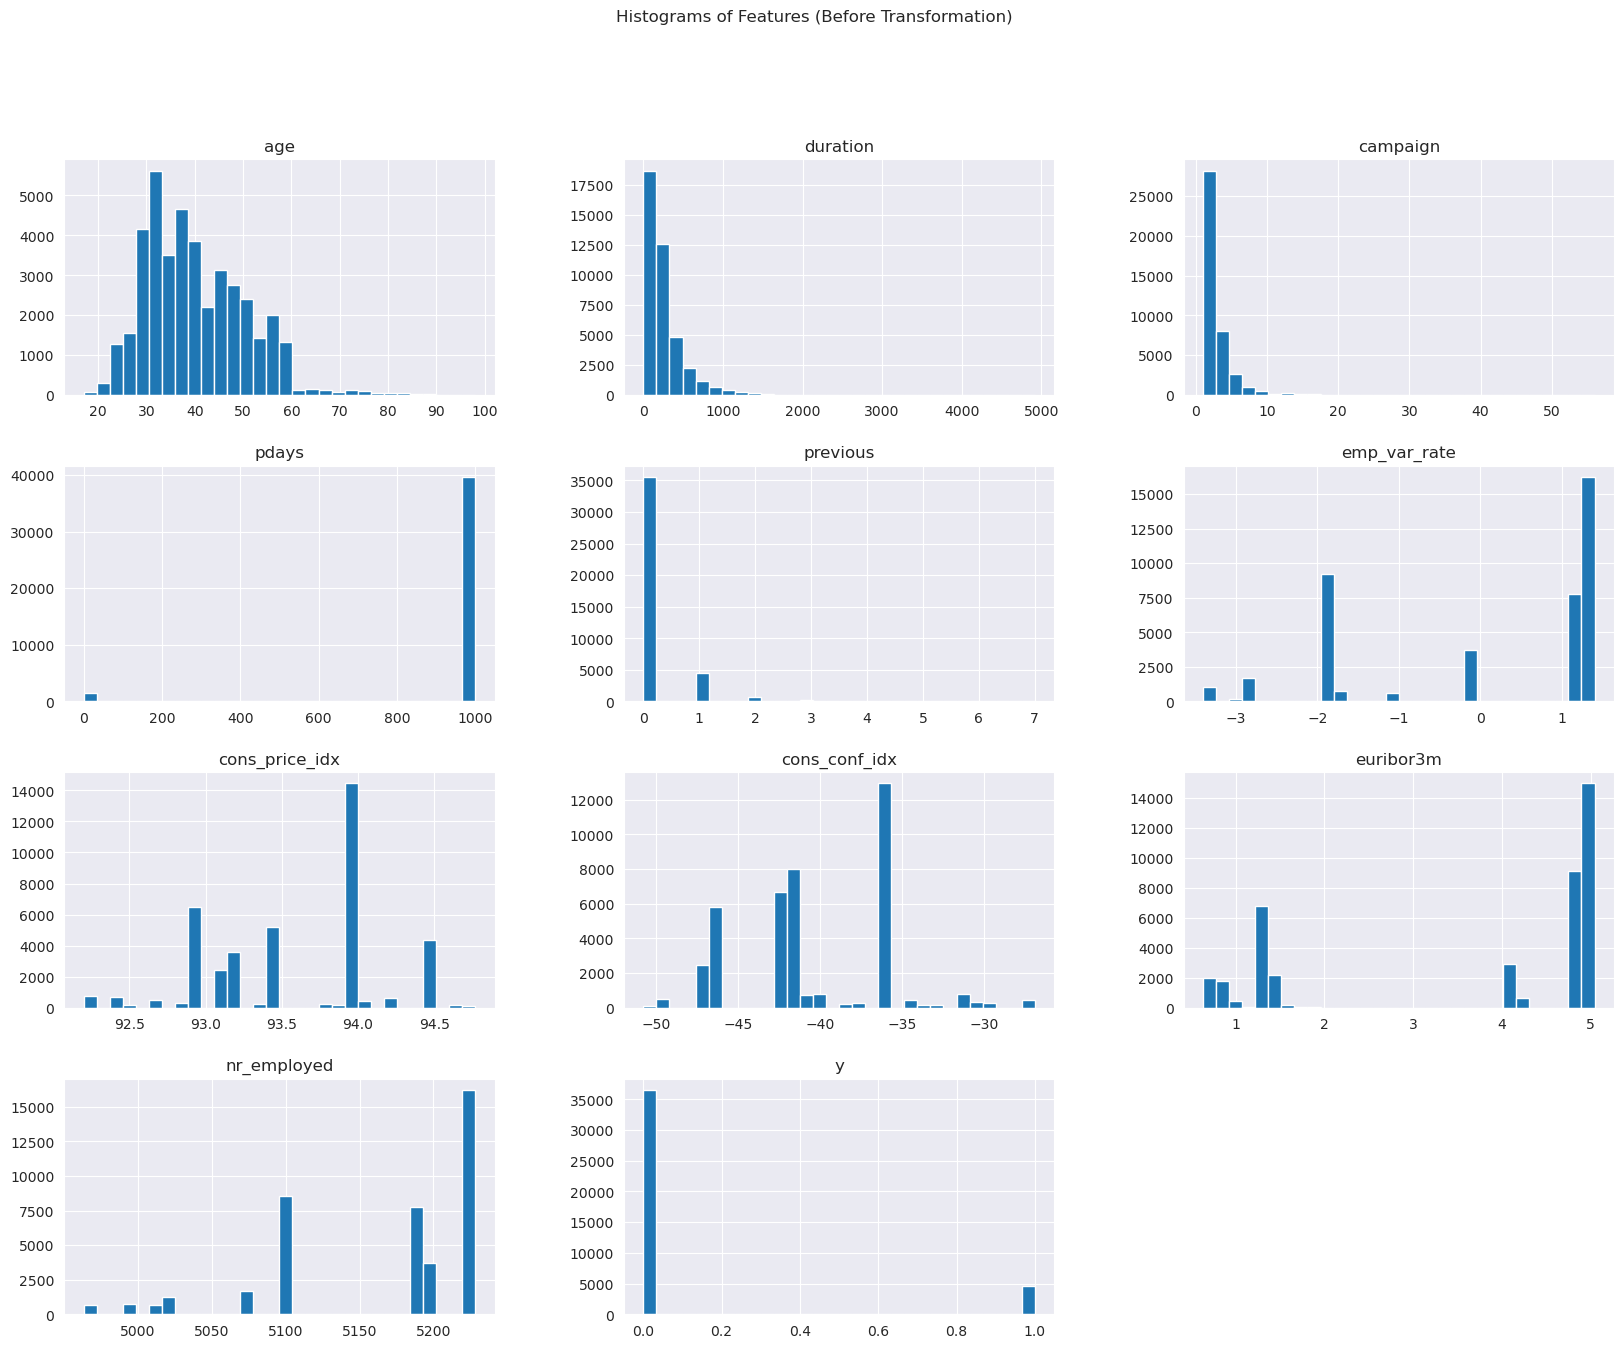

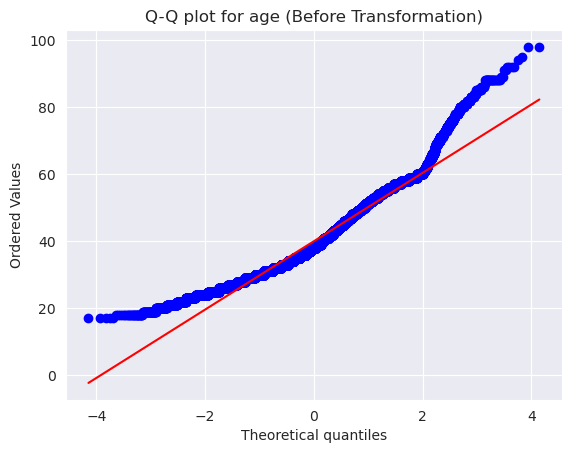

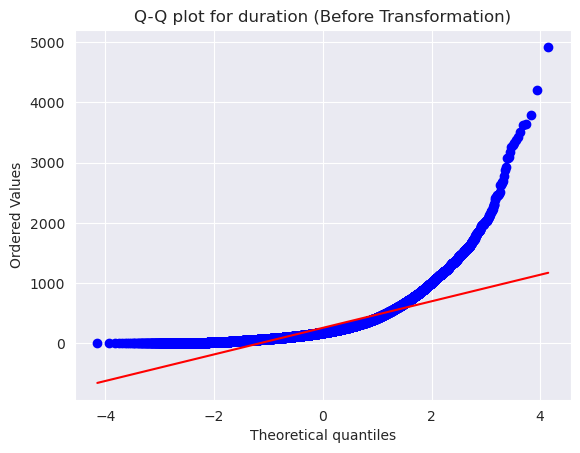

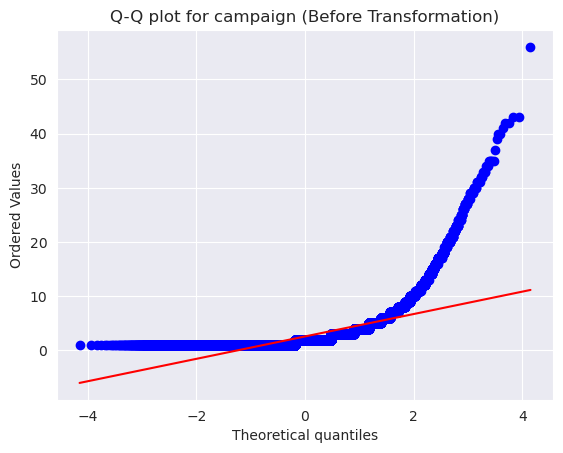

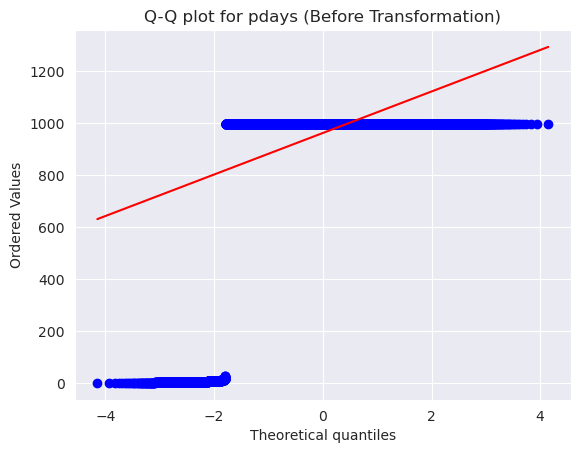

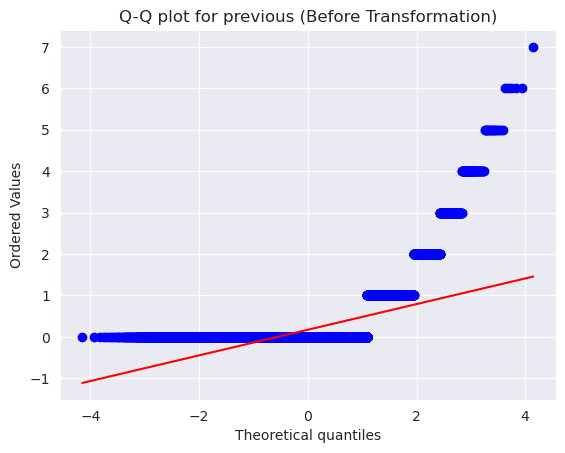

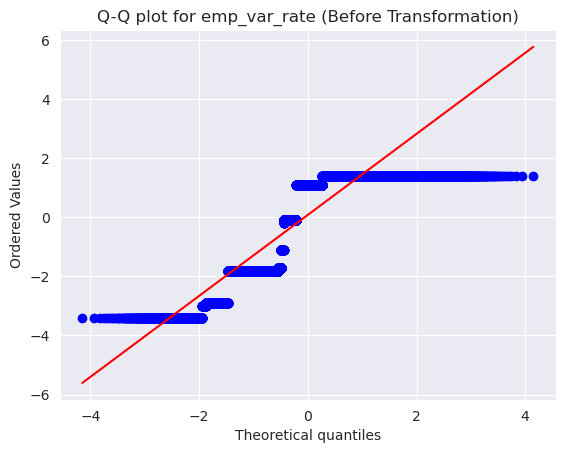

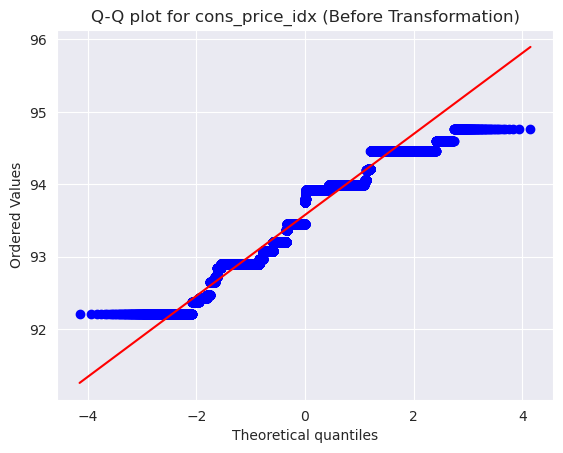

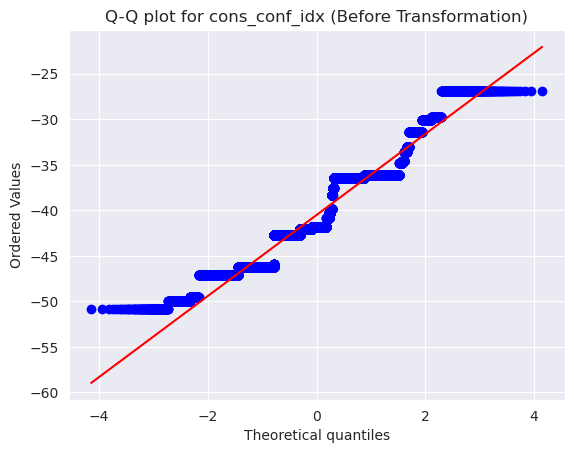

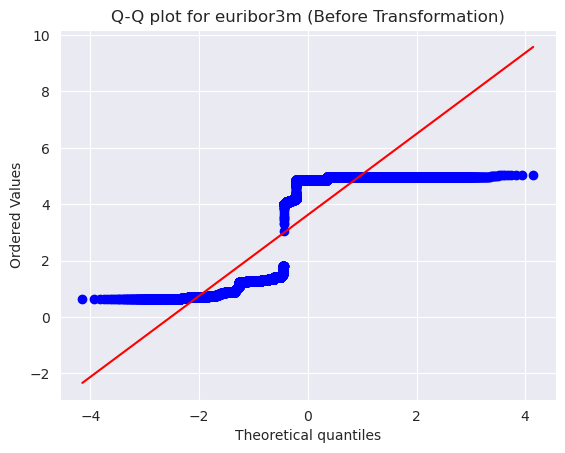

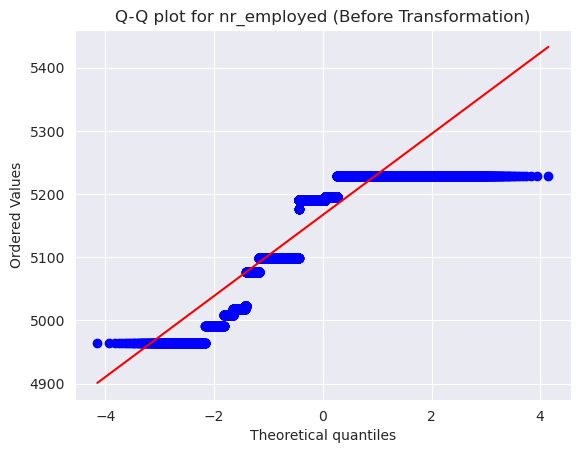

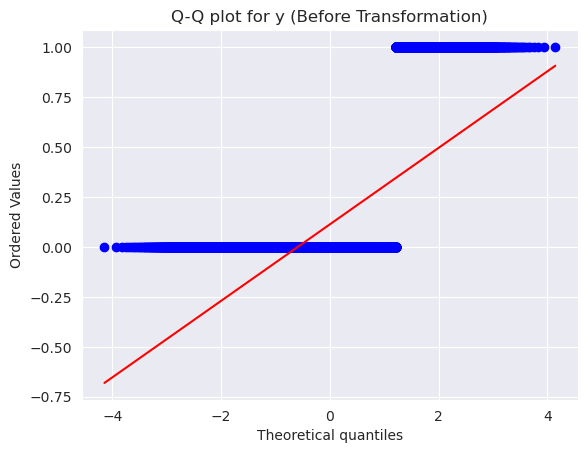

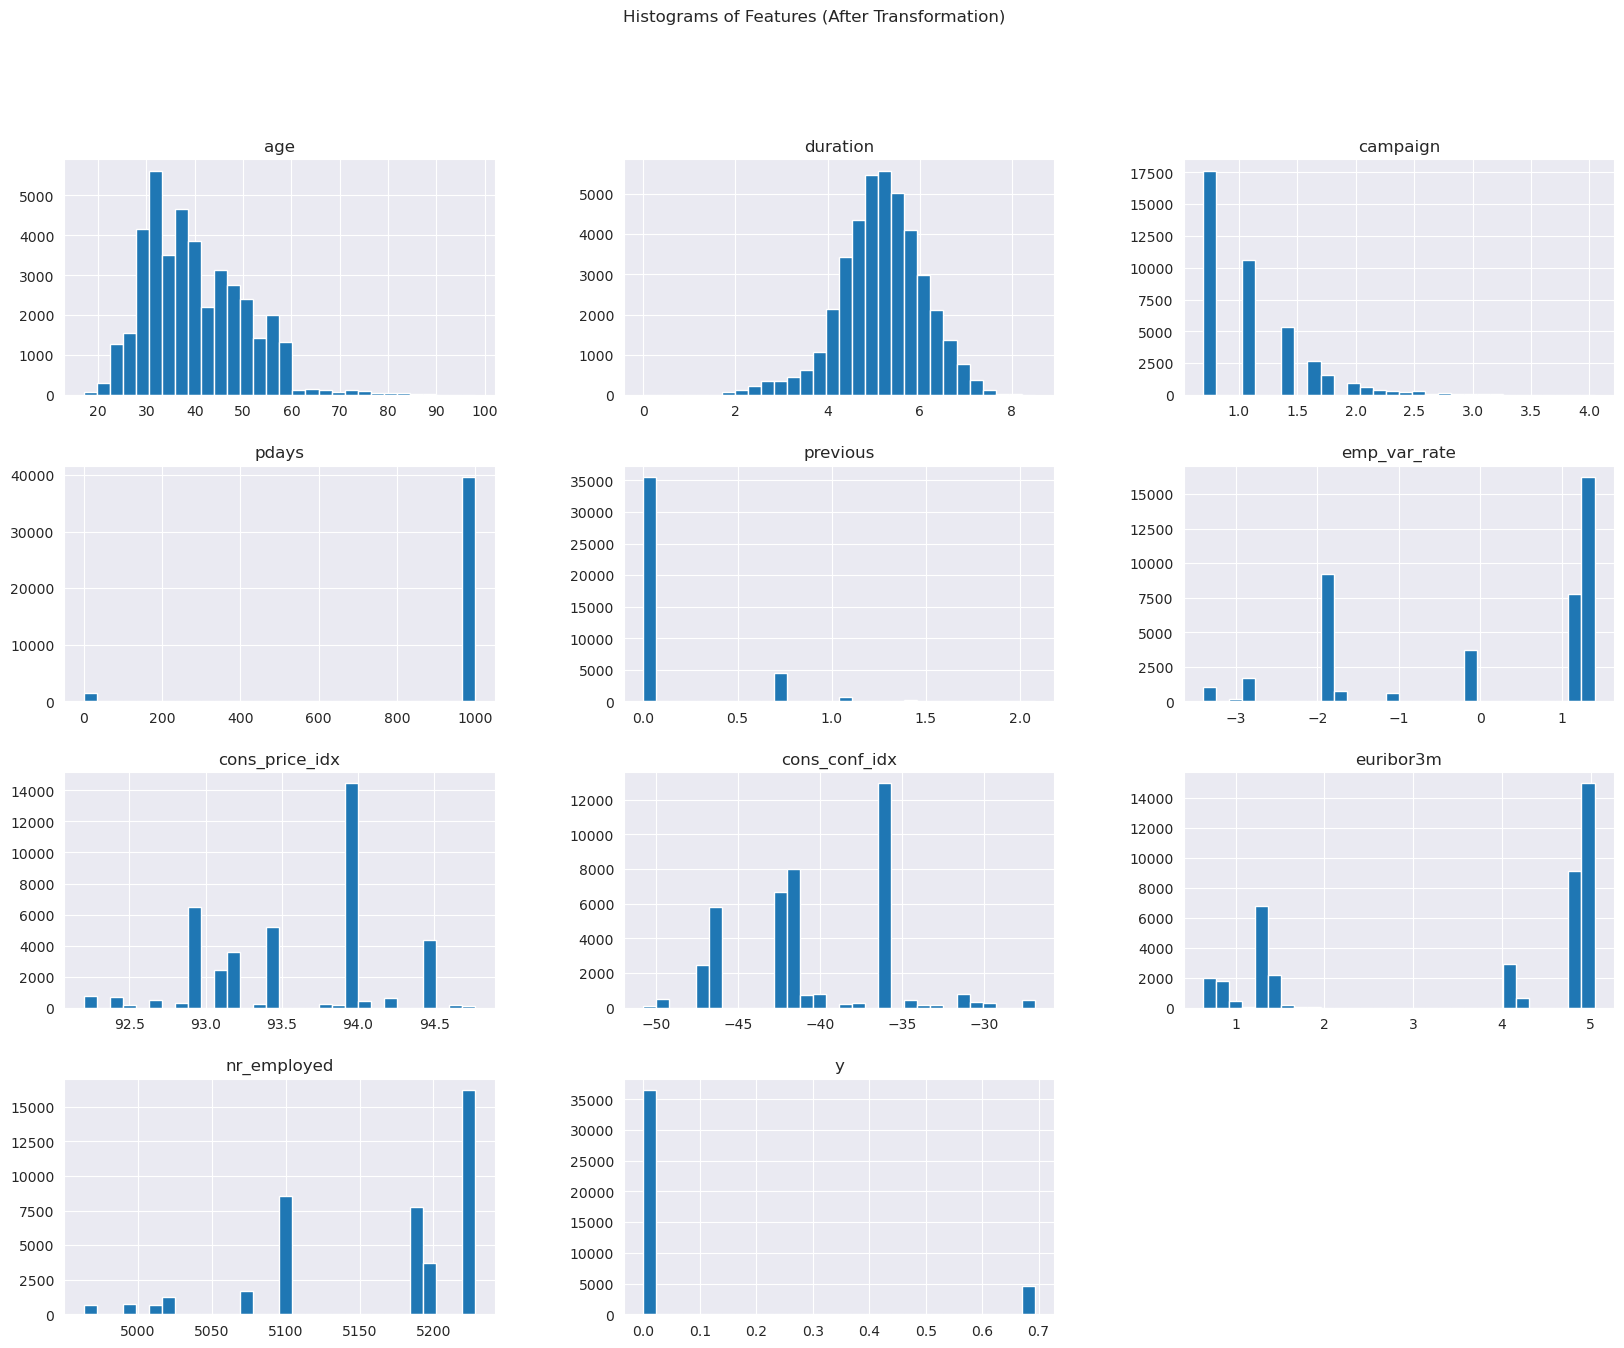

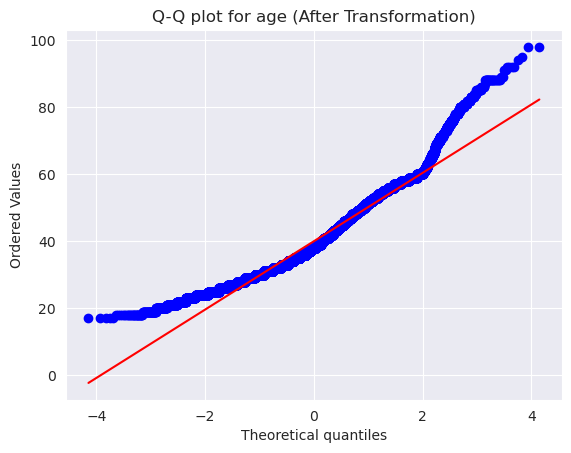

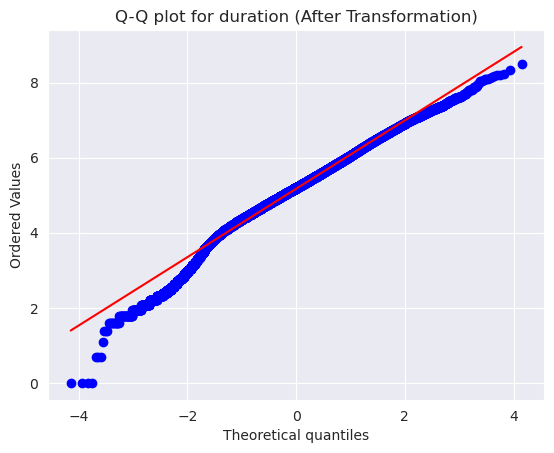

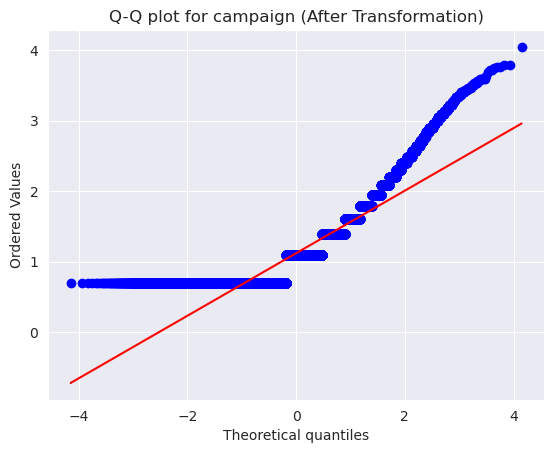

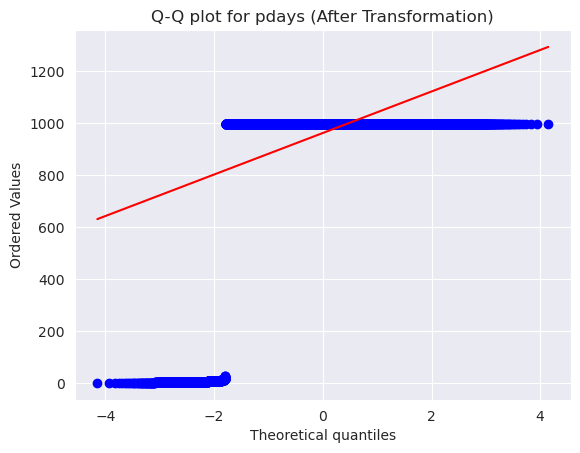

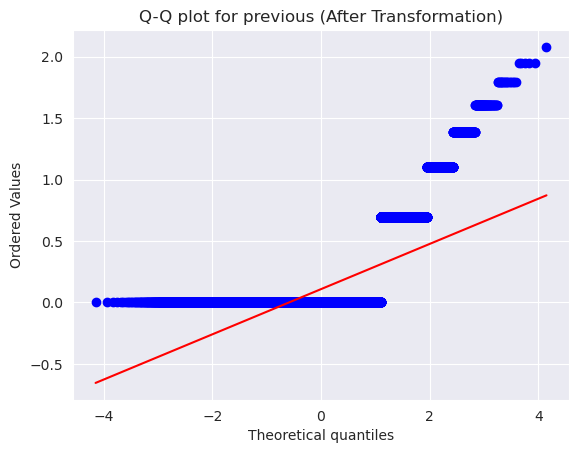

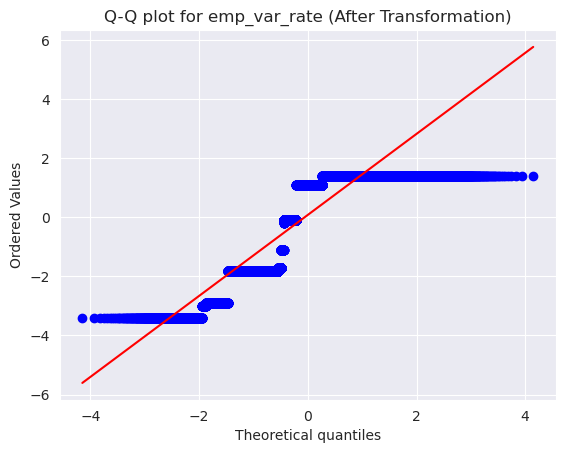

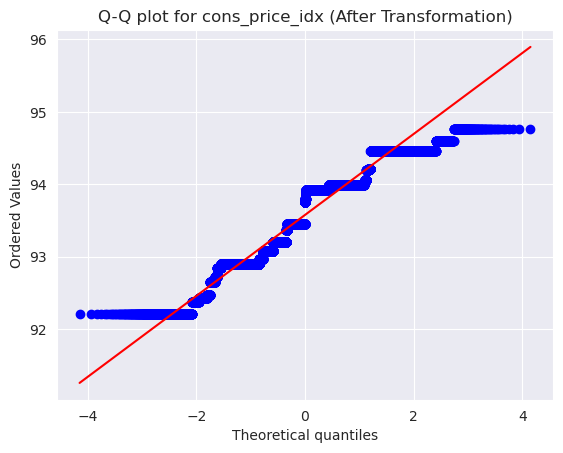

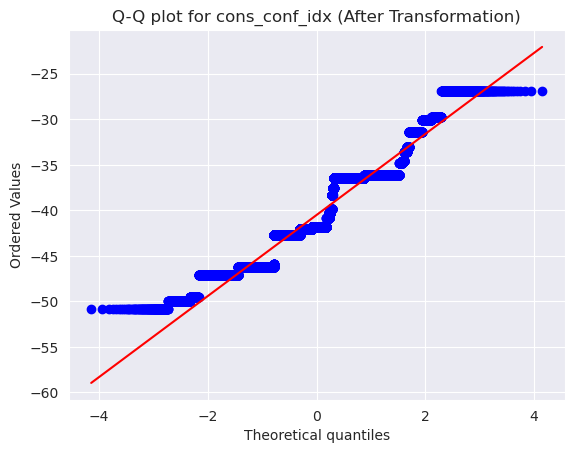

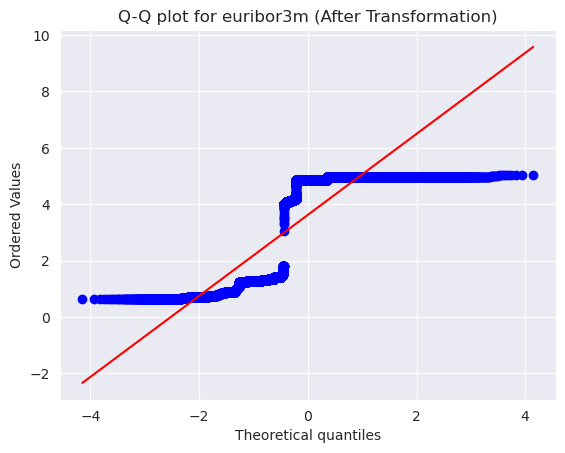

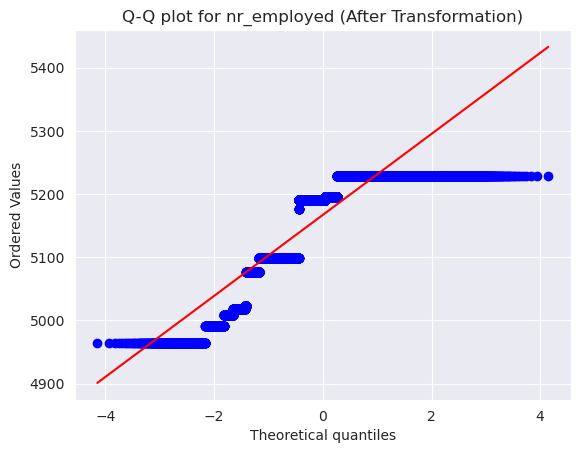

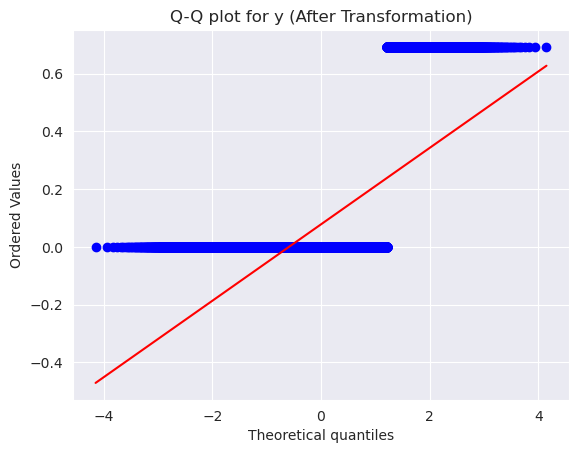

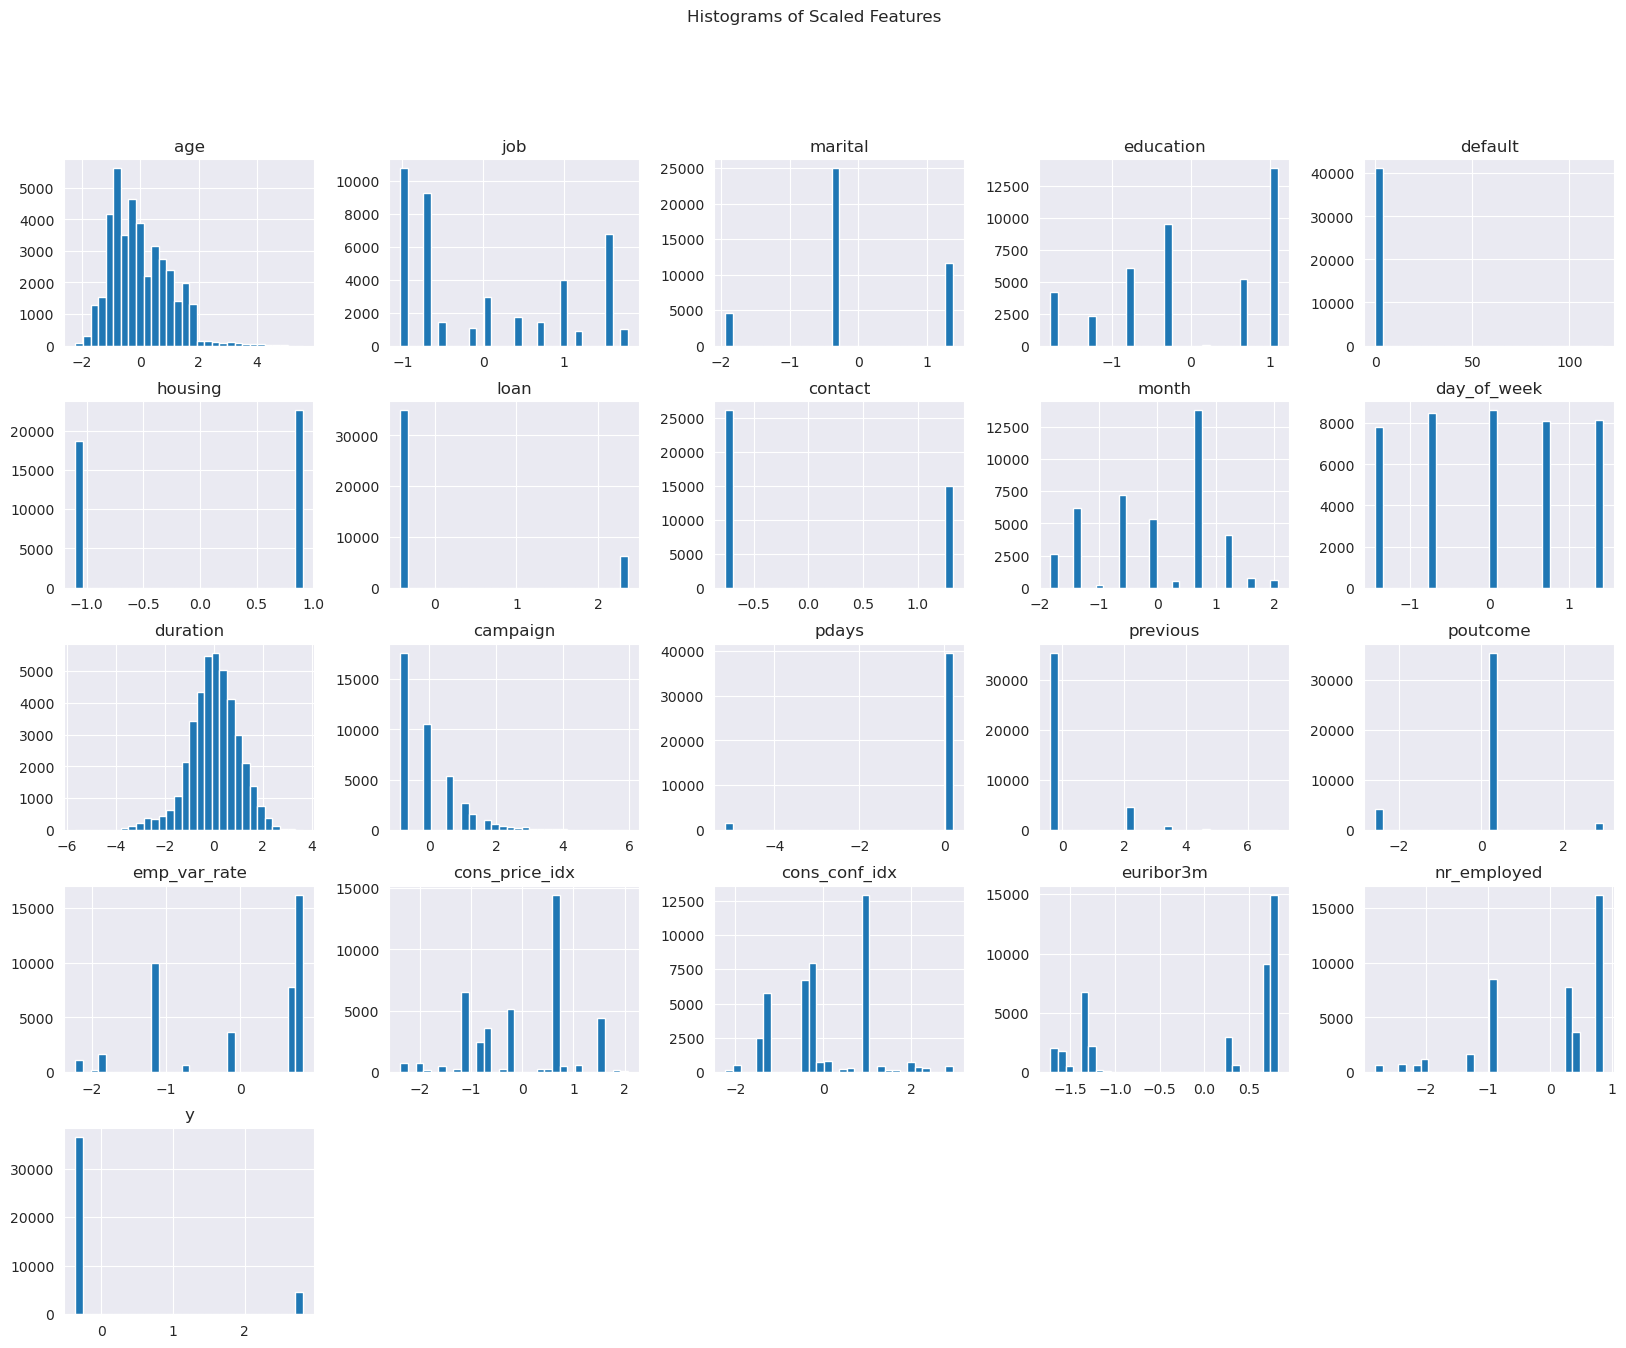

/home/shan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


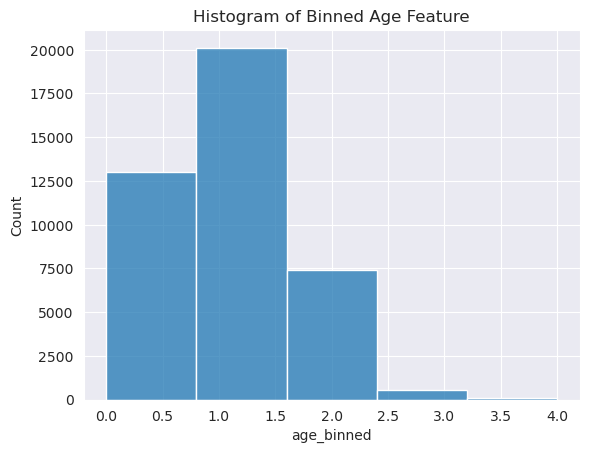

Task 2: Visualization and transformation completed.


In [2]:
# Task 2: Produce Q-Q Plots and Histograms, Apply Transformations

# Select numeric features
numeric_features = df.select_dtypes(include=[np.number]).columns

# Function to plot histograms and Q-Q plots
def plot_visualizations(df, numeric_features, title_suffix=""):
    # Histograms
    df[numeric_features].hist(bins=30, figsize=(20, 15))
    plt.suptitle(f'Histograms of Features {title_suffix}')
    plt.show()

    # Q-Q Plots
    for column in numeric_features:
        plt.figure()
        stats.probplot(df[column], dist="norm", plot=plt)
        plt.title(f'Q-Q plot for {column} {title_suffix}')
        plt.show()

# Initial visualizations
plot_visualizations(df, numeric_features, title_suffix="(Before Transformation)")

# Apply log transformation for positively skewed data
for column in numeric_features:
    if df[column].skew() > 1:
        df[column] = np.log1p(df[column])

# Final visualizations
plot_visualizations(df, numeric_features, title_suffix="(After Transformation)")

# Encode categorical features using Label Encoding for simplicity
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Scale features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Visualize scaled features
df_scaled.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Scaled Features')
plt.show()

# Feature discretization using KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df['age_binned'] = kbins.fit_transform(df[['age']])
sns.histplot(df['age_binned'], bins=5, kde=False)
plt.title('Histogram of Binned Age Feature')
plt.show()

print("Task 2: Visualization and transformation completed.")

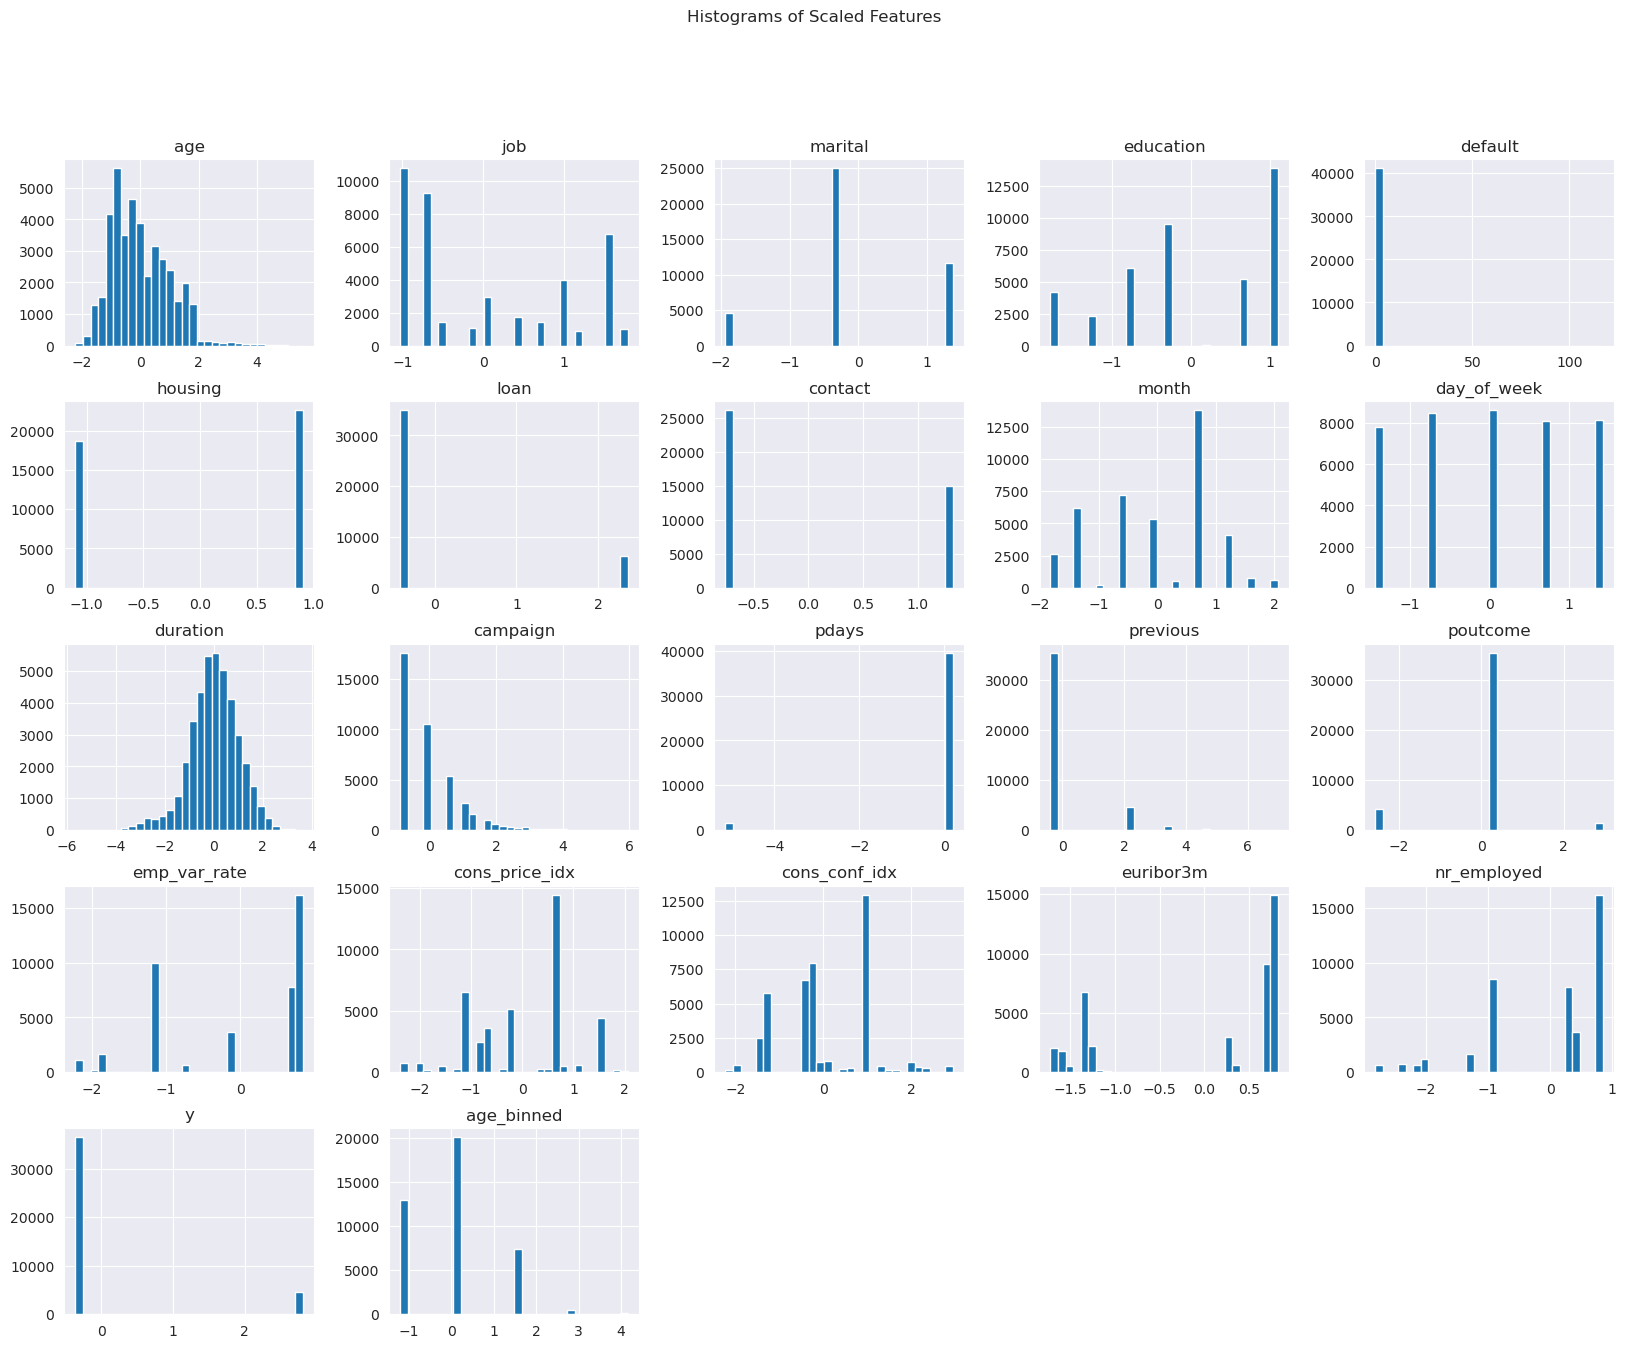

/home/shan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


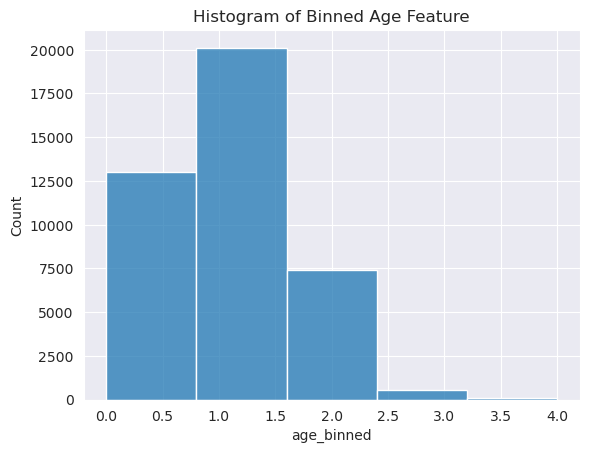

Task 3: Feature coding, scaling, and discretization completed.


In [3]:
# Handle missing values
df.replace('unknown', np.nan, inplace=True)
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].mean())

# Detect and handle outliers using Z-score method
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).all(axis=1)
df = df[~outliers]

# Encode categorical features using One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Scale features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

# Produce relevant graphs to show the scaling/standardizing effect
df_scaled.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Scaled Features')
plt.show()

# Apply feature discretization (e.g., discretize 'age' into 5 bins)
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df_scaled['age_binned'] = kbins.fit_transform(df[['age']])
sns.histplot(df_scaled['age_binned'], bins=5, kde=False)
plt.title('Histogram of Binned Age Feature')
plt.show()

print("Task 3: Feature coding, scaling, and discretization completed.")


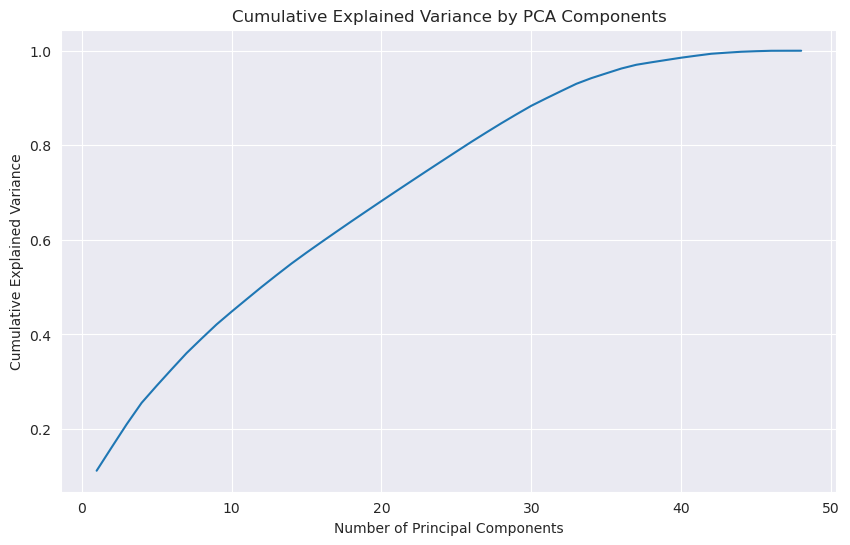

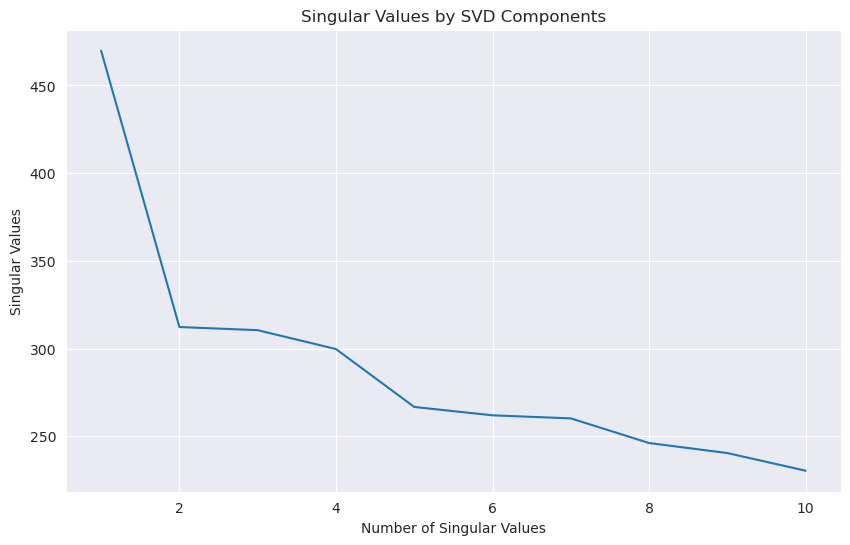

Feature engineering with PCA and SVD completed.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
df = pd.read_csv('banking.csv')

# Handle missing values
df.replace('unknown', np.nan, inplace=True)
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].mean())

# Detect and handle outliers using Z-score method
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).all(axis=1)
df = df[~outliers]

# Encode categorical features using One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Scale features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Apply PCA for Feature Reduction
pca = PCA()
pca.fit(df_scaled)

# Plot Explained Variance Ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Apply SVD for Feature Reduction
svd = TruncatedSVD(n_components=10)  # Adjust n_components as needed
svd.fit(df_scaled)

# Plot Singular Values
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(svd.singular_values_) + 1), svd.singular_values_)
plt.xlabel('Number of Singular Values')
plt.ylabel('Singular Values')
plt.title('Singular Values by SVD Components')
plt.grid(True)
plt.show()

print("Feature engineering with PCA and SVD completed.")


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
df = pd.read_csv('banking.csv')

# Handle missing values
df.replace('unknown', np.nan, inplace=True)
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].mean())

# Detect and handle outliers using Z-score method
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).all(axis=1)
df = df[~outliers]

# Encode categorical features using One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Check available columns
print("Columns after encoding:", df_encoded.columns)

# Split dataset into features and target variable
# Assuming 'y' is the original target column which was encoded to 'y_yes' during encoding
target_column = 'y_yes'
if target_column not in df_encoded.columns:
    target_column = 'y'  # Adjust this if 'y' is the column name after encoding

if target_column not in df_encoded.columns:
    raise KeyError(f"The target column '{target_column}' is not found in the dataset.")

X = df_encoded.drop(target_column, axis=1)
y = df_encoded[target_column]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
svm_model = SVC()
lr_model = LogisticRegression()

# Train models
svm_model.fit(X_train_scaled, y_train)
lr_model.fit(X_train_scaled, y_train)

# Predict using both models
svm_predictions = svm_model.predict(X_test_scaled)
lr_predictions = lr_model.predict(X_test_scaled)

# Evaluate models
print("Support Vector Machine (SVM) Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))
print("Accuracy Score:", accuracy_score(y_test, svm_predictions))

print("\nLogistic Regression (LR) Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_predictions))
print("Classification Report:\n", classification_report(y_test, lr_predictions))
print("Accuracy Score:", accuracy_score(y_test, lr_predictions))


Columns after encoding: Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')
Support Vector Machine (SVM) Results:
Confusion Matrix:

Support Vector Machine (SVM) Results:
Confusion Matrix:
 [[7094  201]
 [ 567  376]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7295
           1       0.65      0.40      0.49       943

    accuracy                           0.91      8238
   macro avg       0.79      0.69      0.72      8238
weighted avg       0.89      0.91      0.90      8238

Accuracy Score: 0.9067734887108522


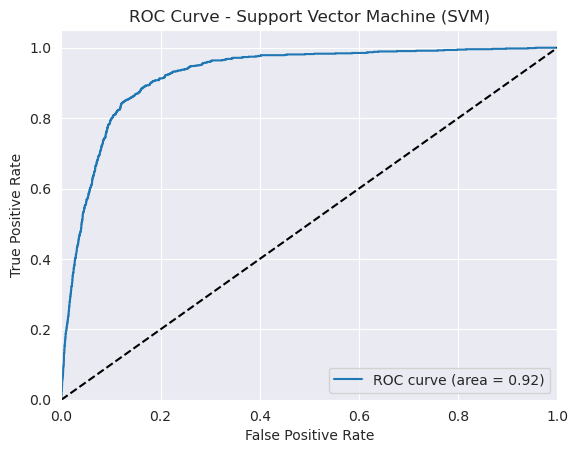

Logistic Regression (LR) Results:
Confusion Matrix:
 [[7067  228]
 [ 534  409]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7295
           1       0.64      0.43      0.52       943

    accuracy                           0.91      8238
   macro avg       0.79      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238

Accuracy Score: 0.9075018208302986


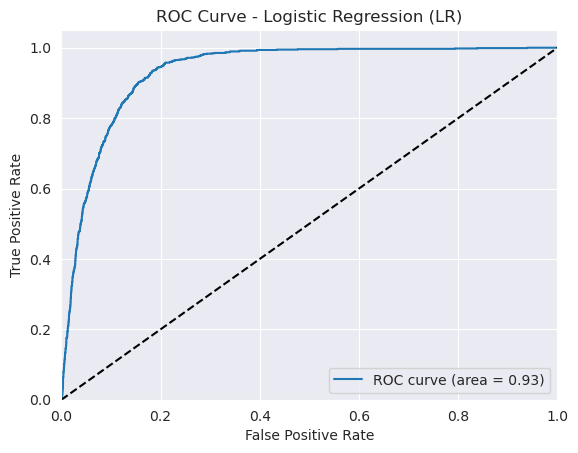

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('banking.csv')

# Handle missing values
df.replace('unknown', np.nan, inplace=True)
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].mean())

# Detect and handle outliers using Z-score method
from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).all(axis=1)
df = df[~outliers]

# Encode categorical features using One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Split dataset into features and target variable
target_column = 'y_yes' if 'y_yes' in df_encoded.columns else 'y'  # Adjust based on your encoding
X = df_encoded.drop(target_column, axis=1)
y = df_encoded[target_column]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
svm_model = SVC(probability=True)
lr_model = LogisticRegression()

# Train models
svm_model.fit(X_train_scaled, y_train)
lr_model.fit(X_train_scaled, y_train)

# Predict using both models
svm_predictions = svm_model.predict(X_test_scaled)
lr_predictions = lr_model.predict(X_test_scaled)

# Evaluate models
def evaluate_model(model_name, y_test, predictions, probas):
    print(f"{model_name} Results:")
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("Accuracy Score:", accuracy_score(y_test, predictions))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, probas)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Get prediction probabilities for ROC
svm_probas = svm_model.predict_proba(X_test_scaled)[:, 1]
lr_probas = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate SVM
evaluate_model('Support Vector Machine (SVM)', y_test, svm_predictions, svm_probas)

# Evaluate Logistic Regression
evaluate_model('Logistic Regression (LR)', y_test, lr_predictions, lr_probas)


In [7]:
import pandas as pd

# Define the new data
new_data = pd.DataFrame(
    {
    'age': [54, 28, 36, 49, 31],
    'job': ['blue-collar', 'management', 'services', 'admin.', 'entrepreneur'],
    'marital': ['single', 'married', 'divorced', 'single', 'married'],
    'education': ['high.school', 'university.degree', 'basic.4y', 'professional.course', 'basic.9y'],
    'default': ['no', 'yes', 'no', 'no', 'yes'],
    'housing': ['no', 'yes', 'no', 'no', 'yes'],
    'loan': ['yes', 'yes', 'no', 'yes', 'no'],
    'contact': ['telephone', 'cellular', 'telephone', 'cellular', 'cellular'],
    'month': ['jul', 'nov', 'mar', 'apr', 'dec'],
    'day_of_week': ['tue', 'thu', 'mon', 'fri', 'wed'],
    'duration': [180, 250, 120, 310, 260],
    'campaign': [2, 3, 1, 2, 4],
    'pdays': [999, 100, 999, 150, 350],
    'previous': [1, 2, 0, 3, 1],
    'poutcome': ['failure', 'success', 'nonexistent', 'failure', 'success'],
    'emp_var_rate': [-0.1, 0.5, -1.2, 1.4, -0.3],
    'cons_price_idx': [94.215, 93.681, 95.321, 92.756, 94.867],
    'cons_conf_idx': [-35.6, -30.8, -39.5, -31.2, -40.3],
    'euribor3m': [3.761, 1.485, 4.217, 4.089, 3.450],
    'nr_employed': [5223.5, 5105.2, 5198.3, 5134.1, 5090.7]
}

)


# Save sample new data to CSV for consistency with the original request
new_data.to_csv('sample_new_banking_data.csv', index=False)


In [8]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Load the dataset for new data
new_data = pd.read_csv('sample_new_banking_data.csv')

# Handle missing values in new data
new_data.replace('unknown', np.nan, inplace=True)
for column in new_data.columns:
    if new_data[column].dtype == 'object':
        new_data[column] = new_data[column].fillna(new_data[column].mode()[0])
    else:
        new_data[column] = new_data[column].fillna(new_data[column].mean())

# Encode categorical features in new data using the same encoding as the training data
# Assuming df_encoded was the encoded dataframe used for training
df_encoded = pd.get_dummies(new_data, drop_first=True)

# Ensure new data has the same columns as the training data
missing_cols = set(X.columns) - set(df_encoded.columns)
for col in missing_cols:
    df_encoded[col] = 0
df_encoded = df_encoded[X.columns]  # Reorder columns to match training data

# Scale the new data using the same scaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Load the trained models
svm_model = joblib.load('svm_model.pkl')
lr_model = joblib.load('lr_model.pkl')

# Make predictions
svm_predictions = svm_model.predict(df_scaled)
lr_predictions = lr_model.predict(df_scaled)

# Print predictions in the desired format
print("\nLogistic Regression Predictions:")
for idx, prediction in enumerate(lr_predictions):
    if prediction == 1:
        print(f"Client {idx + 1}: Will subscribe to a term deposit.")
    else:
        print(f"Client {idx + 1}: Will not subscribe to a term deposit.")

print("\nSVM Predictions:")
for idx, prediction in enumerate(svm_predictions):
    if prediction == 1:
        print(f"Client {idx + 1}: Will subscribe to a term deposit.")
    else:
        print(f"Client {idx + 1}: Will not subscribe to a term deposit.")



Logistic Regression Predictions:
Client 1: Will not subscribe to a term deposit.
Client 2: Will not subscribe to a term deposit.
Client 3: Will subscribe to a term deposit.
Client 4: Will not subscribe to a term deposit.
Client 5: Will not subscribe to a term deposit.

SVM Predictions:
Client 1: Will not subscribe to a term deposit.
Client 2: Will not subscribe to a term deposit.
Client 3: Will not subscribe to a term deposit.
Client 4: Will not subscribe to a term deposit.
Client 5: Will not subscribe to a term deposit.


/home/shan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SVC from version 1.5.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/shan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.5.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
